<a href="https://colab.research.google.com/github/venuJangili/trail/blob/master/Blockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8601 - loss: 0.4768 - val_accuracy: 0.9562 - val_loss: 0.1389
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9550 - loss: 0.1527 - val_accuracy: 0.9698 - val_loss: 0.0990
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9676 - loss: 0.1072 - val_accuracy: 0.9729 - val_loss: 0.0869
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9741 - loss: 0.0862 - val_accuracy: 0.9755 - val_loss: 0.0768
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9776 - loss: 0.0716 - val_accuracy: 0.9754 - val_loss: 0.0765


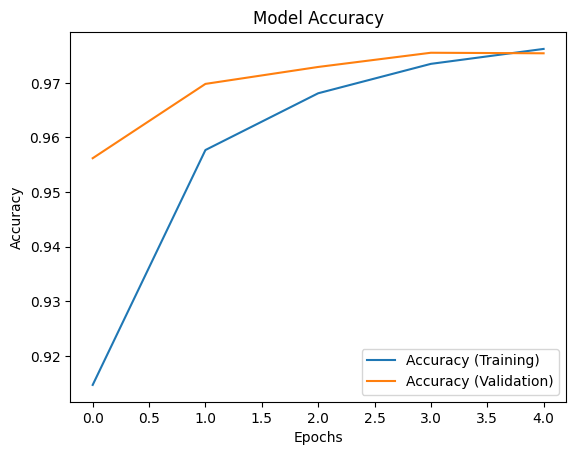

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import hashlib
import json
from time import time
import matplotlib.pyplot as plt
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP

# Deep Learning Model Creation
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Blockchain Implementation
class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        self.new_block(previous_hash='1', proof=100)

    def new_block(self, proof, previous_hash=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.current_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
        self.current_transactions = []
        self.chain.append(block)
        return block

    def new_transaction(self, sender, recipient, amount):
        self.current_transactions.append({
            'sender': sender,
            'recipient': recipient,
            'amount': amount,
        })
        return self.last_block['index'] + 1

    @staticmethod
    def hash(block):
        block_string = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

    @staticmethod
    def proof_of_work(last_proof):
        proof = 0
        while not Blockchain.valid_proof(last_proof, proof):
            proof += 1
        return proof

    @staticmethod
    def valid_proof(last_proof, proof):
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

    @property
    def last_block(self):
        return self.chain[-1]

# Instantiate Blockchain
blockchain = Blockchain()

# Encrypting model results for security
def encrypt_data(data):
    key = RSA.generate(2048)
    cipher = PKCS1_OAEP.new(key)
    encrypted_data = cipher.encrypt(data.encode())
    return encrypted_data

# Training the model
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 784)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 784)).astype('float32') / 255

model = create_model()
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Encrypt and store model accuracy on blockchain
encrypted_result = encrypt_data(str(history.history['accuracy']))
blockchain.new_transaction('model', 'blockchain', encrypted_result)
blockchain.new_block(proof=Blockchain.proof_of_work(blockchain.last_block['proof']))

# Visualizing the model's accuracy
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
